16.11.2020

# Convolutions

## Tutorial 2, Exercise 2


Using numpy, matplotlib and scipy

Application of Fourier transforms and convolution

Your task in this exercise is to try out different implementations of a simple
convolution:

1. using a built-in function
2. implement your own spatial domain convolution
3. use FFTs to implement a frequency domain convolution

The goal is to apply a diagonal camera shake/motion blur to a photo.


**You need to replace the ??? in the code with the required commands**


In [1]:
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt

Configure behavior of pyplot for nicer visualization.

In [2]:
%matplotlib notebook
plt.rcParams["image.cmap"] = "gray"
plt.rcParams["image.interpolation"] = None

 Load the image tree.jpg using the function ```imread()``` from matplotlib.pyplot

In [3]:
tree = plt.imread('tree.jpg')

Extract the red channel only from tree and call it `img`.
Make sure that it is of floating point datatype and normalized to $[0, 1]$.

<IPython.core.display.Javascript object>


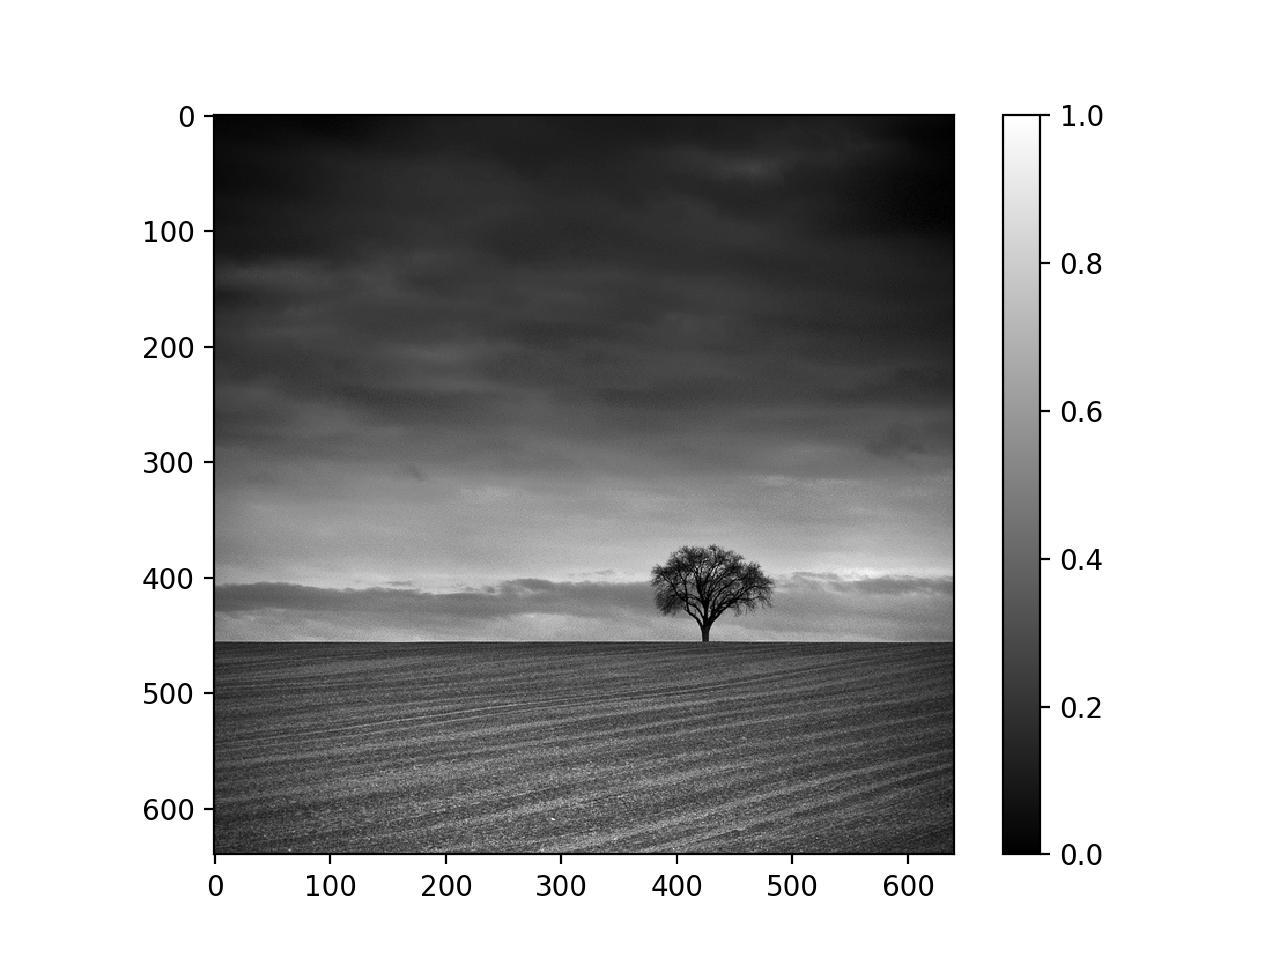

In [4]:
img = tree[:,:,0]
img = img / img.max()

plt.figure()
plt.imshow(img)
plt.colorbar()

Now create a ```5x5``` numpy array containing ```.2``` on the main diagonal, ```0.``` otherwise.
 This will be the convolution kernel. You can use either a loop approach,
the diag function from numpy, or the eye function also from the numpy module
 to do this. 
 
 Check the functions documentations to learn what they do. We highly discourage the loop approach as it is not 'pythonic'.

In [5]:
np.diag?


In [6]:
kernel = np.eye(5)*0.2
kernel = np.diag((0.2, )*5)
print(kernel)

[[0.2 0.  0.  0.  0. ]
 [0.  0.2 0.  0.  0. ]
 [0.  0.  0.2 0.  0. ]
 [0.  0.  0.  0.2 0. ]
 [0.  0.  0.  0.  0.2]]


 2D convolution using a scipy function
 Use the function ```convolve``` from scipy.ndimage (already imported as nd) in
 `wrap` mode to calculate the convolution of `img` and `kernel`. If you are
 unsure how to use the function, look at its documentation.

In [7]:
nd.convolve?

<IPython.core.display.Javascript object>


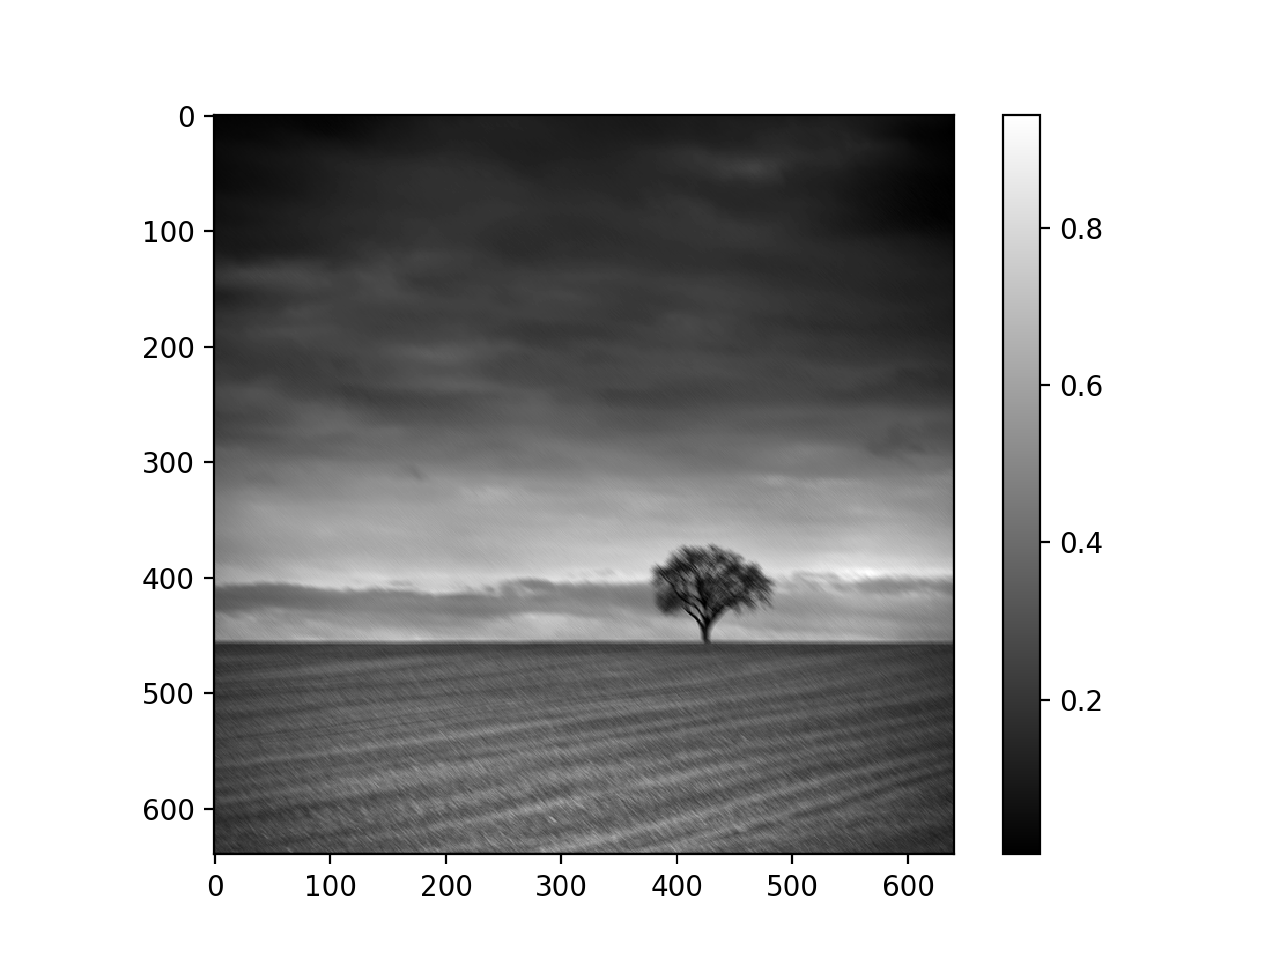

In [8]:
result_function = nd.convolve(img, kernel, mode='wrap')

plt.figure()
plt.imshow(result_function)
plt.colorbar()

2D convolution using explicit python code. You will now calculate the
convolution of img and kernel by using **only basic python/numpy** operations:

In [12]:
2%3

2

<IPython.core.display.Javascript object>


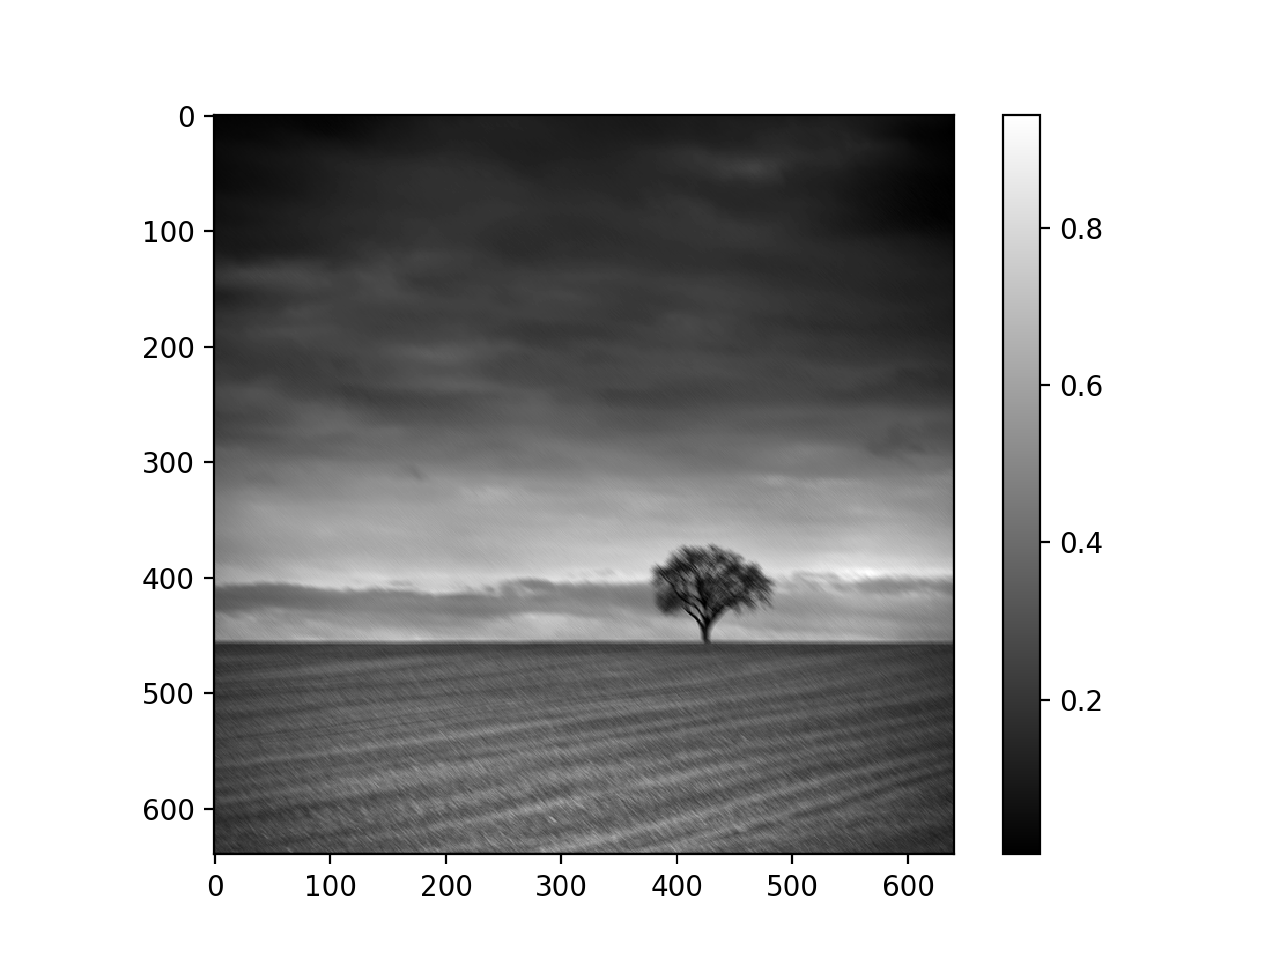

In [9]:
# initialize the array where the result is stored.
result_explicit = np.zeros_like(img)

# store height and width of image and kernel
h, w = img.shape
kh, kw = kernel.shape

# Calculate the discrete two-dimensional convolution integral. Loop over all
# pixels in img. Note this is very slow because it has four for loops (not
# generally a good idea)
for y in range(h): #Loop through the image rows
    for x in range(w): #Loop through the image cols
        # initialize result for pixel at y, x
        val = 0.
        # loop over all pixels in kernel
        for j in range(kh): #Loop through kernel rows
            for i in range(kw): #Loop through kernel cols
                # "The location imageY and imageX is calculated so that for the
                # center element of the filter it'll be y, x, but for the other
                # elements it'll be a pixel from the image to the left, right,
                # top or bottom of y, x. It's modulo divided through the
                # width (w) or height (h) of the image so that pixels outside
                # the image will be wrapped around. Take care how the modulo
                # division works for negative values. Now, pixel (-1, -1) will
                # correctly become pixel (h-1, w-1)."
                # (source: http://lodev.org/cgtutor/filtering.html)
                imageY = (h + y - kh//2 + j) % h
                imageX = (w + x - kw//2 + i) % w
                val += img[imageY, imageX] * kernel[i, j]
        # assign result to pixel at y, x
        result_explicit[y, x] = val

plt.figure()
plt.imshow(result_explicit)
plt.colorbar()

# Bonus Task (not mandatory)


 2D convolution using Fourier theorem: A convolution in real space is equivalent to a multiplication
 in Fourier space.
 
 You should be aware that you have to zero-pad the ```5x5``` kernel array to the
 size of the image prior to taking the Fourier transform. The best result
 is achieved, when you zero-pad in a way that the center pixel of the
kernel becomes the top-left most pixel in the padded array.

 The functions for fft and ifft can be found in ```np.fft.fft2``` and ```np.fft.ifft2```
 take the Fourier transform of the image

(640, 640)


<IPython.core.display.Javascript object>


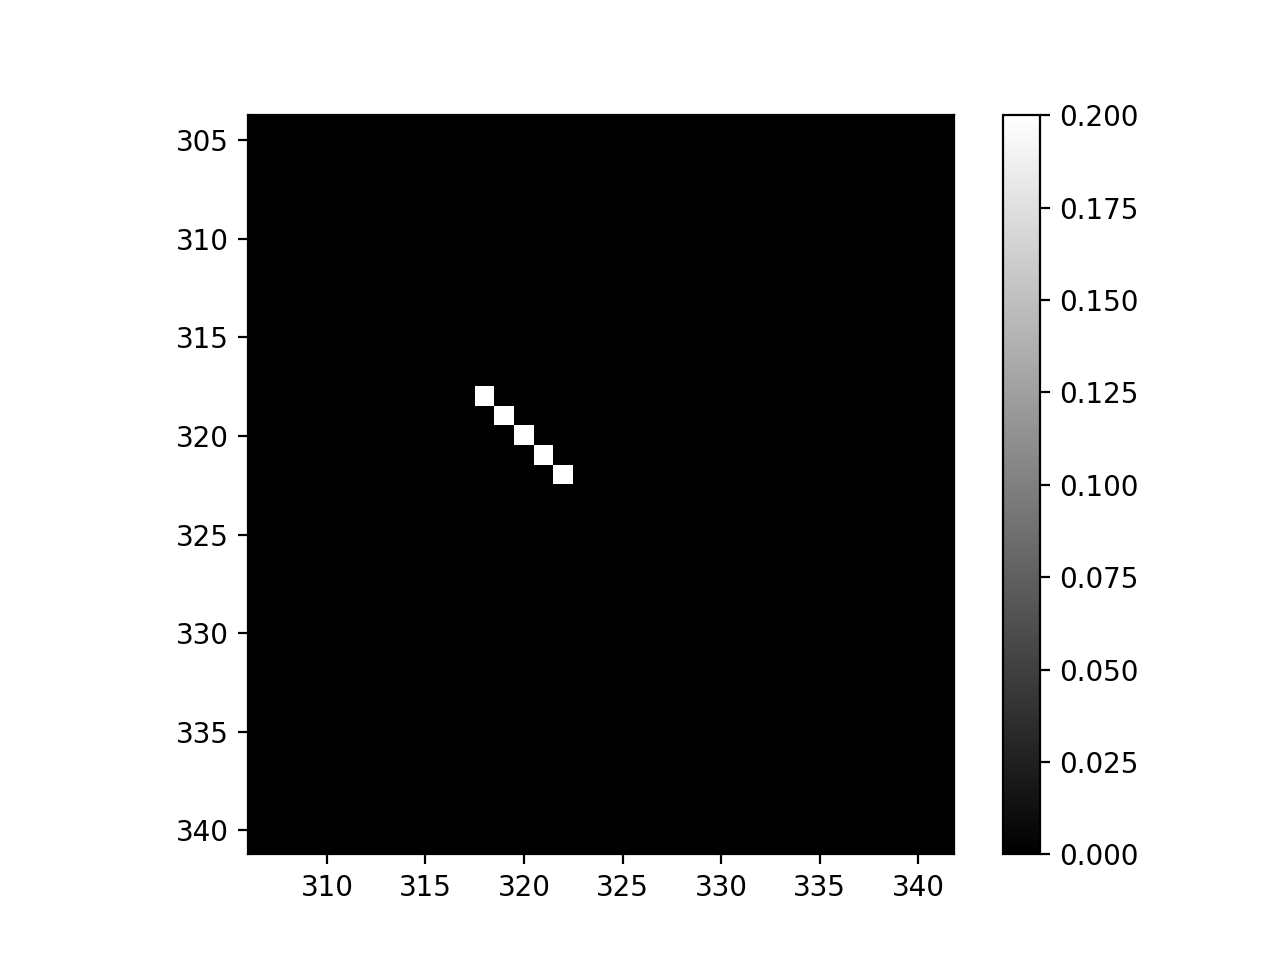

<IPython.core.display.Javascript object>


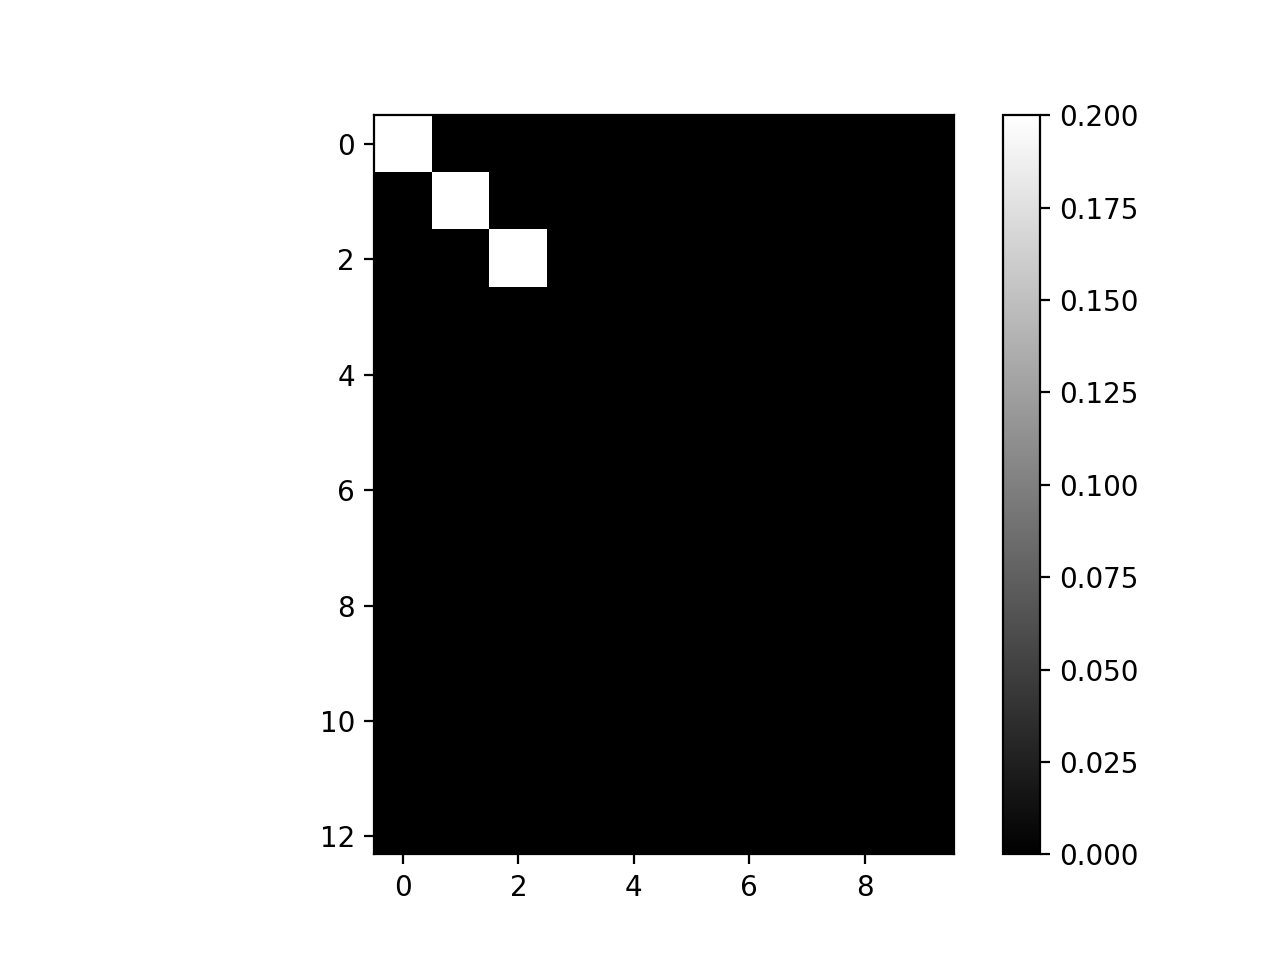

In [14]:
# take the Fourier transform of the image
img_ft = np.fft.fft2(img)

# Zero-pad the kernel so same size as img
kernel_pad = np.zeros_like(img, dtype="float64")
print(kernel_pad.shape)
kernel_pad[h//2-kh//2:h//2+kh//2+1, w//2-kw//2:w//2+kw//2+1] = kernel #write kernel in the center of 0'padding


plt.figure()
plt.imshow(kernel_pad)
plt.colorbar()

kernel_pad2 = np.fft.ifftshift(kernel_pad)#center is aligned with python origin at the upper left corner
plt.figure()
plt.imshow(kernel_pad2)
plt.colorbar()

<IPython.core.display.Javascript object>


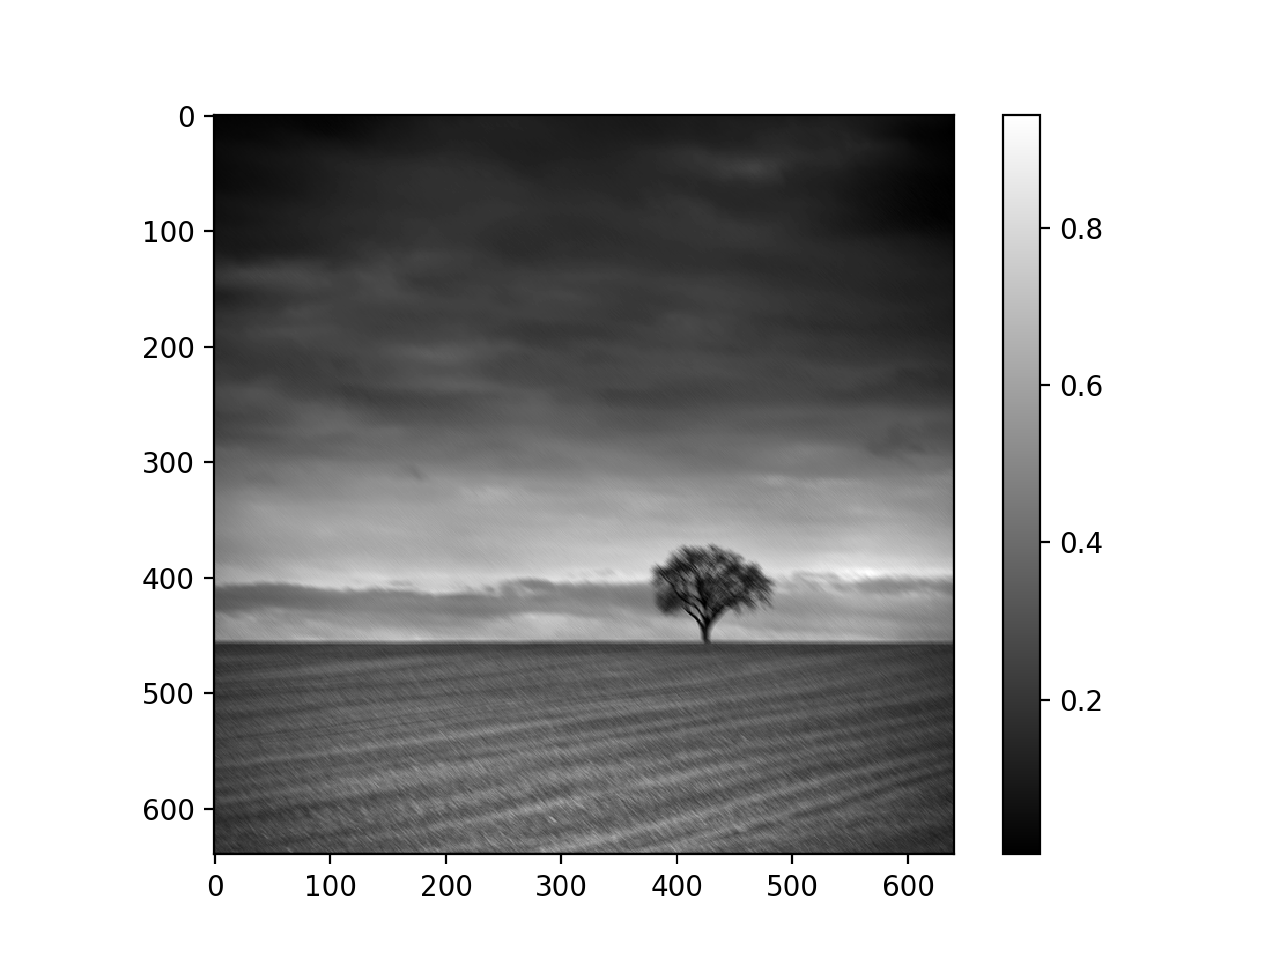

In [15]:
# Take the Fourier transform of the zero-padded kernel
kernel_ft = np.fft.fft2(kernel_pad2)

# Take the inverse Fourier transform of the product of the FTs of the image
# and kernel. You might discard the imaginary part
result_fourier = np.fft.ifft2(img_ft * kernel_ft).real

plt.figure()
plt.imshow(result_fourier)
plt.colorbar()